In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import glob 
import medpy.io
%matplotlib inline

---

# Helpers Function 

In [46]:
def plot_comparison(input_img, caption, n_row=1, n_col=2, figsize=(5, 5), cmap = 'gray'):
    '''
    Plot comparison of multiple image but only in column wise!
    :param input_img: Input image list
    :param caption: Input caption list
    :param IMG_SIZE: Image size
    :param n_row: Number of row is 1 by DEFAULT
    :param n_col: Number of columns
    :param figsize: Figure size during plotting
    :return: Plot of (n_row, n_col)
    '''
    print()
    assert len(caption) == len(input_img), "Caption length and input image length does not match"
    assert len(input_img) == n_col, "Error of input images or number of columns!"

    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    fig.subplots_adjust(hspace=0.4, wspace=0.4, right=0.7)

    for i in range(n_col):
        axes[i].imshow(np.squeeze(input_img[i]), cmap= cmap)
        axes[i].set_xlabel(caption[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    plt.tight_layout()
    plt.show()
    
def plot_hist(inp_img, titles, n_row=1, n_col=2,
              n_bin=20, ranges=[0, 1], figsize=(5, 5)):
    '''
    Plot histogram side by side
    :param inp_img: Input image stacks as list
    :param titles: Input titles as list
    :param n_row: Number of row by DEFAULT 1
    :param n_col: Number of columns by DEFAULT 2
    :param n_bin: Number of bins by DEFAULT 20
    :param ranges: Range of pixel values by DEFAULT [0,1]
    :param figsize: Figure size while plotting by DEFAULT (5,5)
    :return:
        Plot of histograms
    '''
    assert len(titles) == len(inp_img), "Caption length and input image length does not match"
    assert len(inp_img) == n_col, "Error of input images or number of columns!"

    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    fig.subplots_adjust(hspace=0.4, wspace=0.4, right=0.7)

    for i in range(n_col):
        inp = np.squeeze(inp_img[i])
        axes[i].hist(inp.ravel(), n_bin, ranges)
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Pixel Value')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
def min_max_norm(images):
    """
    Min max normalization of images
    Parameters:
        images: Input stacked image list
    Return:
        Image list after min max normalization
    """
    m = np.max(images)
    mi = np.min(images)
    images = (images - mi)/ (m - mi)
    return images

------

# List Directory Tree Structure

In [2]:
#remove testing file from BRATS2015_testing to normalize
#the same path length w.r.t training folder
# !tree -d /home/kevinteng/Desktop/BRATS2015/

In [3]:
!pwd

/home/kevinteng/Desktop/Att_Unet


----

# Dataset Info

Image size: 240x240
Image slices: 155
Image max value: 1584
Image min value: 0
Mean value of image:74.67340927419355
Standard deviation of image:185.8698325818118


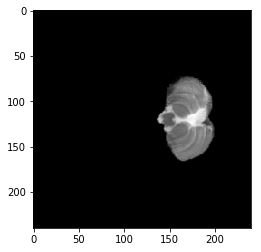

In [34]:
tmp_path = '/home/kevinteng/Desktop/BRATS2015/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54515/VSD.Brain.XX.O.MR_T2.54515.mha'

img_tmp, img_header = medpy.io.load(tmp_path)
print('Image size: {0}x{0}'.format(img_tmp.shape[0]))
print('Image slices: {}'.format(img_tmp.shape[2]))
print('Image max value: {}'.format(np.max(img_tmp)))
print('Image min value: {}'.format(np.min(img_tmp)))
print('Mean value of image:{}'.format(np.mean(img_tmp)))
print('Standard deviation of image:{}'.format(np.std(img_tmp)))
plt.imshow(img_tmp[:,:,20], cmap='gray')

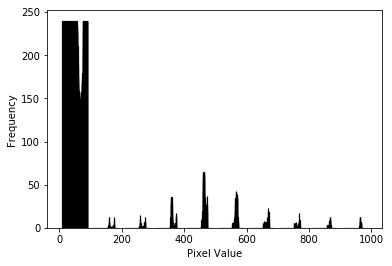

In [5]:
#plot histogram
plt.hist(img_tmp[:,:,20], edgecolor = 'black', linewidth = 1.2)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

---

# Read Directory 

In [6]:
in_path = '/home/kevinteng/Desktop/BRATS2015/'
out_path = '/home/kevinteng/Desktop/BRATS_data/'

total_patients = []
#directory for training and testing 
for d_00 in sorted(os.listdir(in_path)):
    #ignore zip files 
    if not d_00.endswith('.zip'):
        print(d_00)
        merge_d00 = os.path.join(in_path + d_00)
    #skip the loop for .zip extension 
    else:
        continue
    #create file directory [Training, Testing]
    save_path_01 = (out_path+d_00+'/')
    if not os.path.exists(save_path_01):
        os.makedirs(save_path_01)
        
    # training or testing > hgg or lgg
    for d_01 in sorted(os.listdir(merge_d00)):
        print(' ->',d_01)
        merge_d01 = os.path.join(merge_d00+'/'+d_01)
        patient_counts = 0
        #create file directory [HGG, LGG]
        save_path_02 = (save_path_01+d_01+'/')
        if not os.path.exists(save_path_02):
            os.makedirs(save_path_02)
            
        for steps_01, d_02 in enumerate(sorted(os.listdir(merge_d01))):
            break_01 = 0
            #debug
            #list only the first dir
            if steps_01==0:
                break_01 = 1 
                print('  -->', d_02)
            #
            patient_counts+=1
            merge_d02 = os.path.join(merge_d01+'/'+d_02)
            
            multimodal_name_list = []
            for steps_02, d_03 in enumerate(sorted(os.listdir(merge_d02))):
                #create file 
                multimodal_file_name = d_03.split('.')[-2] #MR_Flair, T2,..
                multimodal_name_list.append(multimodal_file_name)
                save_path_03 = (save_path_02+multimodal_file_name+'/')
                if not os.path.exists(save_path_03):
                    os.makedirs(save_path_03)
                #debug
                #list only the first dir
                if break_01==1 and steps_02 != 5:
                    print('   --->', d_03)
                #
                merge_d03 = os.path.join(merge_d02+'/'+d_03)
                #read files with wild card .mha ending
                med_img = glob.glob('{}/*.mha'.format(merge_d03)) #return list!
                save_path_04 = (save_path_02+multimodal_file_name+'/')
                for mha in med_img:
                    read_med_img, _ = medpy.io.load(mha)
                #file name => e.g. MR_Flair_brats_2013_pat0103_1.npy (multimodal + patient name)
                np.save(save_path_04+'{}_{}.npy'.format(multimodal_file_name, d_02), read_med_img)
#                 plt.imshow(read_med_img[:,:,20], cmap = 'gray')
#                 plt.show()
        print('*Number of patients: {}'.format(patient_counts))
        total_patients.append(patient_counts)
        print()

print()
n_slices = 155
t_patients = np.sum(total_patients)
print('[Summary]')
print('Total number of patients: {}'.format(t_patients))
print('Total number of 2D images: {}'.format(t_patients*n_slices))
print('  |_ Training: {}'.format((t_patients-total_patients[0])*n_slices))
print('  |_ Testing: {}'.format(total_patients[0]*n_slices))

BRATS2015_Testing
 -> HGG_LGG
  --> brats_2013_pat0103_1
   ---> VSD.Brain.XX.O.MR_Flair.54193
   ---> VSD.Brain.XX.O.MR_T1.54194
   ---> VSD.Brain.XX.O.MR_T1c.54195
   ---> VSD.Brain.XX.O.MR_T2.54196
*Number of patients: 110

BRATS2015_Training
 -> HGG
  --> brats_2013_pat0001_1
   ---> VSD.Brain.XX.O.MR_Flair.54512
   ---> VSD.Brain.XX.O.MR_T1.54513
   ---> VSD.Brain.XX.O.MR_T1c.54514
   ---> VSD.Brain.XX.O.MR_T2.54515
   ---> VSD.Brain_3more.XX.O.OT.54517
*Number of patients: 220

 -> LGG
  --> brats_2013_pat0001_1
   ---> VSD.Brain.XX.O.MR_Flair.54632
   ---> VSD.Brain.XX.O.MR_T1.54633
   ---> VSD.Brain.XX.O.MR_T1c.54634
   ---> VSD.Brain.XX.O.MR_T2.54635
   ---> VSD.Brain_3more.XX.O.OT.54637
*Number of patients: 54


[Summary]
Total number of patients: 384
Total number of 2D images: 59520
  |_ Training: 42470
  |_ Testing: 17050


---

# Visualizing Data 

### Before pre-processing

In [19]:
dataset_hgg_path = '/home/kevinteng/Desktop/BRATS_data/BRATS2015_Training/HGG/'

img_list = []
file_name = []
for modal in sorted(os.listdir(dataset_hgg_path)):
    merge_dir = os.path.join(dataset_hgg_path+modal)
    for num, npy in enumerate(sorted(os.listdir(merge_dir))):
        merge_dir_npy = os.path.join(merge_dir+'/'+npy)
        img = np.load(merge_dir_npy)
    img_list.append(img)
    file_name.append(modal)


In [20]:
print(file_name)

['MR_Flair', 'MR_T1', 'MR_T1c', 'MR_T2', 'OT']


In [17]:
imgs = np.array(img_list)
print(imgs.shape)

(5, 240, 240, 155)


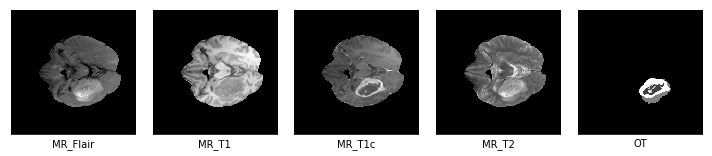

In [39]:
#layout images of different modal
plot_comparison(imgs[:,:,:,50], file_name, n_col=len(imgs), figsize = (10,10))

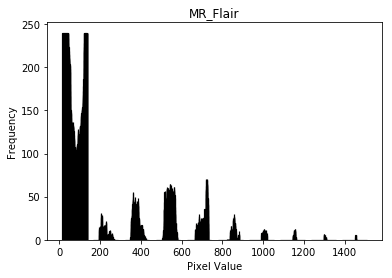

Image size: 240x240
Image slices: 155
Image max value: 1524
Image min value: 0
Mean value of image:146.48196180555556
Standard deviation of image:261.0431828653199


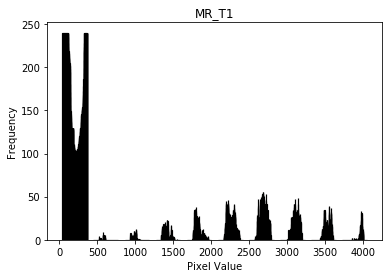

Image size: 240x240
Image slices: 155
Image max value: 4090
Image min value: 0
Mean value of image:709.5326388888889
Standard deviation of image:1204.3953687131807


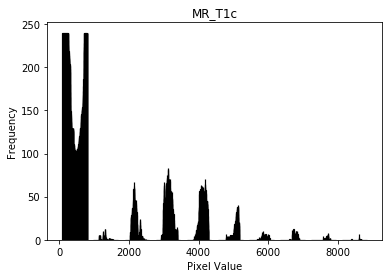

Image size: 240x240
Image slices: 155
Image max value: 8925
Image min value: 0
Mean value of image:973.6755555555555
Standard deviation of image:1677.0295555186333


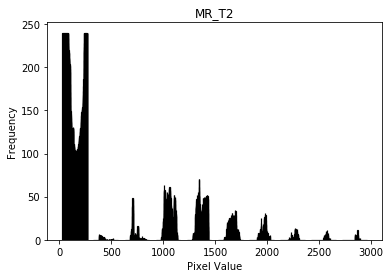

Image size: 240x240
Image slices: 155
Image max value: 2992
Image min value: 0
Mean value of image:362.8049826388889
Standard deviation of image:622.8808614343079


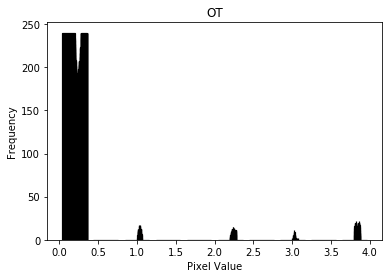

Image size: 240x240
Image slices: 155
Image max value: 4
Image min value: 0
Mean value of image:0.09970486111111111
Standard deviation of image:0.5642164395609313


In [45]:
for index, images in enumerate(imgs):
    plt.hist(images[:,:,50], edgecolor = 'black', linewidth = 1.2)
    plt.title(file_name[index])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
    print('Image size: {0}x{0}'.format(images.shape[1]))
    print('Image slices: {}'.format(images.shape[2]))
    print('Image max value: {}'.format(np.max(images[:,:,50])))
    print('Image min value: {}'.format(np.min(images[:,:,50])))
    print('Mean value of image:{}'.format(np.mean(images[:,:,50])))
    print('Standard deviation of image:{}'.format(np.std(images[:,:,50])))
    

In [42]:
#OT is the label, with index 4
labels = np.unique(imgs[4,:,:,50])
print('Labels: {}'.format(labels))

Labels: [0 1 2 3 4]


### Image Pre-processing 

#### Min. Max. Normalization

In [67]:
#min max normalization
min_max_norm_imgs=[]
for i in range(4):
    norm_img = np.array(min_max_norm(imgs[i,:,:,50])) #last index is label, no need to normalzie
    min_max_norm_imgs.append(norm_img)
    
min_max_norm_imgs = np.array(min_max_norm_imgs)

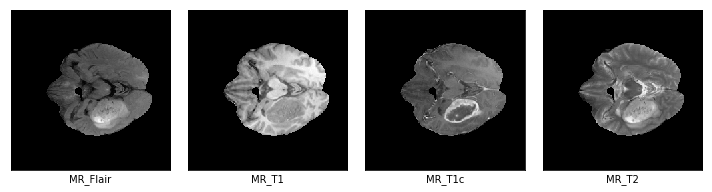

In [72]:
plot_comparison(min_max_norm_imgs, file_name[0:4], n_col=len(imgs)-1, figsize = (10,10))

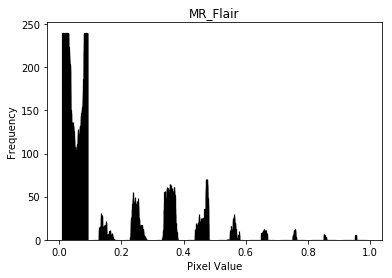

Image max value: 1.0
Image min value: 0.0
Mean value of image:0.09611677283829104
Standard deviation of image:0.17128817773314958


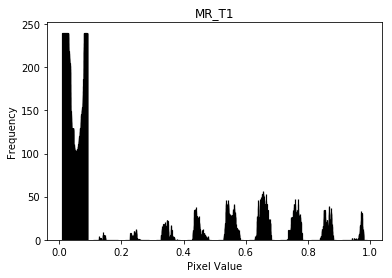

Image max value: 1.0
Image min value: 0.0
Mean value of image:0.1734798628090193
Standard deviation of image:0.29447319528439625


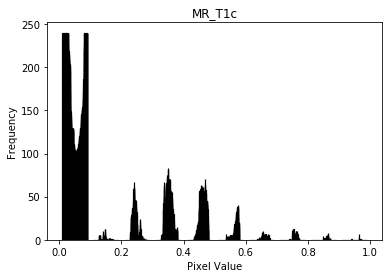

Image max value: 1.0
Image min value: 0.0
Mean value of image:0.10909530034235915
Standard deviation of image:0.18790247120656955


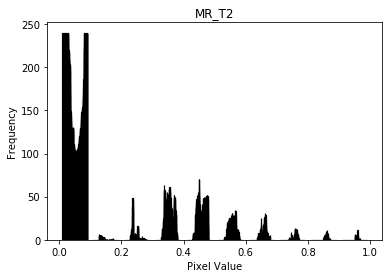

Image max value: 1.0
Image min value: 0.0
Mean value of image:0.12125834981246285
Standard deviation of image:0.20818210609435422


In [73]:
for index, images in enumerate(min_max_norm_imgs):
    plt.hist(images, edgecolor = 'black', linewidth = 1.2)
    plt.title(file_name[index])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
    print('Image max value: {}'.format(np.max(images)))
    print('Image min value: {}'.format(np.min(images)))
    print('Mean value of image:{}'.format(np.mean(images)))
    print('Standard deviation of image:{}'.format(np.std(images)))

#### Standardization 

In [112]:
def channel_standardization(image):
    '''
    Stanadrdization of image channel wise => Standard score
    Parameters: 
        image: Input image
    Return:
        Standardized image, s.t. (pixel_value -)
    '''
    mean_val = np.mean(image, axis = -1)
    std_dev_val = np.std(image, axis = -1)
    output = (image-np.expand_dims(mean_val, axis = -1))/(np.expand_dims(std_dev_val, axis = -1))
    #some val for std.dev = 0
    cast = np.nan_to_num(output)
    
    return cast

In [116]:
standardization_imgs = channel_standardization(imgs[0:4])

/home/kevinteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


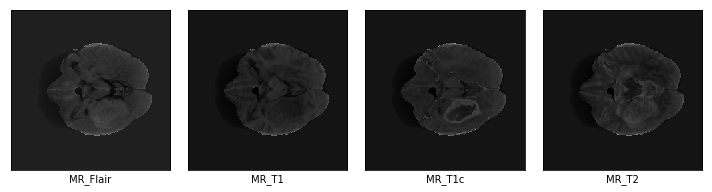

In [118]:
plot_comparison(standardization_imgs[:,:,:,50], file_name[0:4], n_col=len(imgs)-1, figsize = (10,10))

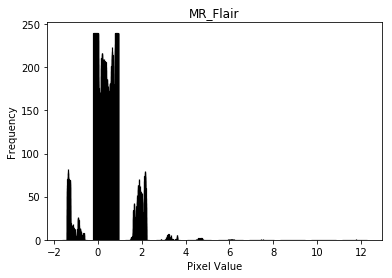

Image max value: 12.409673645990857
Image min value: -1.7626022937306018
Mean value of image:0.21151445269616198
Standard deviation of image:0.5692843578719272


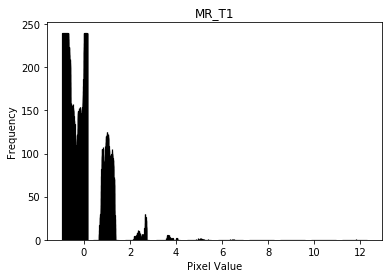

Image max value: 12.409673645990857
Image min value: -1.069247243788307
Mean value of image:0.20329309302590384
Standard deviation of image:0.525047327155596


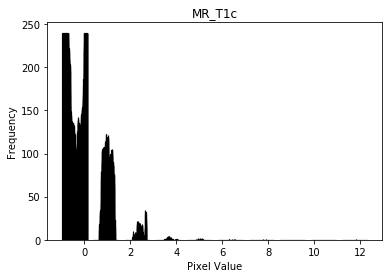

Image max value: 12.409673645990855
Image min value: -1.0923571579462392
Mean value of image:0.23364022049710126
Standard deviation of image:0.558958576054518


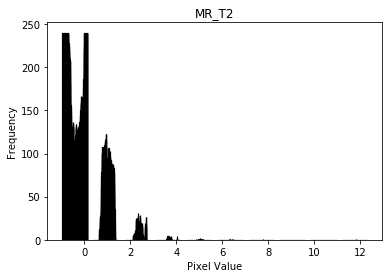

Image max value: 12.409673645990857
Image min value: -1.0873544255725571
Mean value of image:0.23542648296214289
Standard deviation of image:0.5668511684940826


In [120]:
for index, images in enumerate(standardization_imgs):
    plt.hist(images[:,:,50], edgecolor = 'black', linewidth = 1.2)
    plt.title(file_name[index])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
    print('Image max value: {}'.format(np.max(images[:,:,50])))
    print('Image min value: {}'.format(np.min(images[:,:,50])))
    print('Mean value of image:{}'.format(np.mean(images[:,:,50])))
    print('Standard deviation of image:{}'.format(np.std(images[:,:,50])))